
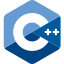
<br>

<div style="text-align:center; font-size:200%;">
  <b>Test-Driven-Development</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 01 Test-Driven-Development.ipynb -->
<!-- slides/module_410_unit_testing/topic_170_test_driven_development.cpp -->


## Idea

- Use tests to drive the design and feature development of the program
- Each new test describes a feature increment of the program
- (Good testable code is created as a by-product)


## Problem

How can tests drive the design of the program?


## Possible answers

- Tests use the functionality and therefore highlight clumsy interfaces
- Tests enable refactoring


## Refactoring

- Improve the code structure without changing the behavior
  - Proceed in small steps
  - After each step, the code is executable again
- Objectives:
  - Improve the code
  - Improve the design


## Refactoring and Tests

- Refactoring improves the design of the program in small steps
- The correctness of these steps is verified by tests


## So what???

<img src="img/velocity-tests-03.png"
     style="display:block;margin:auto;width:70%"/>


## Test-Driven Development

- The goal of TDD is not primarily to achieve high test coverage
- The goal of TDD is to discover a good design through testing
  - When writing the tests, one tries to design the interfaces of classes and
    functions in such a way that it is easy to use
  - Because all essential parts of the program are protected by tests,
    one can permanently adapt the design to the current feature set through
    refactoring


## The TDD Cycle
- Write a (minimal) test
  - The test only tests one new (partial) feature: **Baby Steps**
  - This test fails
- Implement the minimal functionality to get the test to work
  - You don't have to pay attention to clean code or good design
  - But: **Solve Simply**
- Improve the code
  - Remove the dirty constructs introduced in the previous step
  - Generalize the implementation if there is too much repetition
  - **This step is not optional!!!**


## The TDD cycle

- <span style="color: red"><b>Red (failing test)</b></span>
- <span style="color: green"><b>Green (all tests are green again)</b></span>
- <span style="color: blue"><b>Clean/Refactor (the code is clean again)</b></span>


## Baby steps

- The system does not spend hours or days in a state in which it is not buildable,
  testable or executable
- This allows you to quickly get feedback from the code with every change
- Frequent merging and CI becomes possible


## Why Solve Simply?

- A flexible, generic solution often increases the complexity of the system
- It is only worthwhile if the flexibility is actually needed
- Developers usually have a hard time predicting where flexibility/extensibility is
  needed
- A flexible, generic solution is often much more difficult to implement than
  a simple solution for a more specific use case
- The most obvious flexible, generic solution is often not the cleanest and
  most maintainable code


## Assumptions of Solve Simply
- It is possible to refactor code into a clean, maintainable state without changing
  functionality
- It is possible to extend code iteratively and make it more flexible when needed
- It is easier to carry out the refactoring and iteration steps than to develop
  the final solution right away
- These assumptions are only fulfilled if a sufficient number of good unit tests
  are available


## Even better: TDD + preparation step

- Refactor the code so that the change becomes easy
  - This is often not that easy...
  - If during the refactoring it becomes clear that tests are missing, they are added
- Do the easy change with the TDD cycle
- Repeat these steps over and over again


## Guided Kata: Mars Rover (or Grid World)

- An exercise in TDD that shows how tests can drive the design
- The important thing is the procedure, not just the final solution
- Goal: Learn to work incrementally and iteratively!


## Guided Kata: Mars Rover

We will program a rover that can navigate a grid.
- The rover has
  - a position `(x, y)` and
  - a direction (North, East, South, or West).
- It can receive a sequence of commands:
  - `L` (turn left 90 degrees),
  - `R` (turn right 90 degrees), and
  - `M` (move forward one grid point).


### Step-by-step TDD Flow

This flow shows how each new test forces a change or addition to the design.


### Cycle 1: Creating the Rover

#### RED:
- Write a test that asserts a newly created `Rover` object is at position
  `{0, 0}` and facing `N` (North).
- This test will fail because the `Rover` class doesn't exist yet.
- When writing this test we have to think about data types for positions and
  commands.

```cpp
Rover rover();
REQUIRE(rover.getPosition() == Point{0, 0});
REQUIRE(rover.getDirection() == Direction::N);
```

#### GREEN:
- Create the required data types for position (`Point`) and direction
  (`Direction`).
- Create a `Rover` class with a constructor and member variables for its
  position and direction to make the test pass.

#### REFACTOR:
- The code is simple, so maybe just clean up naming or formatting.
- This cycle drives the creation of the Rover class and establishes its
  initial state.


### Cycle 2: Adding Behavior - Turning

#### RED:
- Write a test to check that sending the command `R` to a rover facing `N`
  makes it face `E` (East).
- It will fail because there is no command execution method yet.

```cpp
Rover rover();
rover.executeCommands("R");
REQUIRE(rover.getDirection() == Direction::E);
```

#### GREEN:
- Implement an `executeCommands(const std::string&)` method.
- Add simple if/else or switch logic to handle the `R` command and update the
  rover's direction.
- Add another test for turning left (`L`) and implement the logic for it.

#### REFACTOR:
- The `if`/`else` chain for managing directions (`N` -> `E`, `E` -> `S`,
  etc.) is getting clunky.
- This is a great opportunity to refactor the direction from a char to an
  enum and extract the turning logic into private methods
  (`turnLeft`/`turnRight`).


### Cycle 3: Adding Behavior - Moving

#### RED:
- Write a test to check that sending `M` to a rover at `{10, 10}` facing `N`
  moves it to `{10, 11}`.
- It will fail.

```cpp
Rover rover({10, 10}, Direction::N);
rover.executeCommands("M");
REQUIRE(rover.getPosition() == Point{10, 11});
```

#### GREEN:
- Add logic to the `executeCommands` method to change the rover's position
  based on its current direction.

#### REFACTOR:
- The movement logic could be a long switch statement. We can extract it into
  a private `move()` method to keep the `executeCommands` method clean.


### Cycle 4: Driving Design with a New Requirement

This is the key step that shows TDD driving high-level design!

#### RED:
- Introduce the concept of "wrapping."
- Write a test asserting that a rover at the edge of a 10x10 grid (e.g., at
  `{5, 9}`) facing `N` moves to `{5, 0}`.
- This test will fail because the Rover has no concept of a grid; it will
  just move to `{5, 10}`.

```cpp
Rover rover({10, 10}, {5, 9}, Direction::N);
rover.executeCommands("M");
REQUIRE(rover.getPosition() == Point{5, 0});
```


### Cycle 4 (Cont.): The "Aha!" Moment

#### GREEN:
- To make this pass, you must introduce the grid's dimensions into the moving
  logic. The simplest solution is to pass the grid size into the `move()`
  method or the `Rover` constructor. But this feels messy.

#### REFACTOR:
- The test has revealed a flaw in the design: The Rover knows too much about
  the world's rules.
- This drives a significant design improvement: Create a `Grid` class.
- The Rover is placed on the `Grid`, and the `Grid` is now responsible for
    calculating the next position.
- The Rover's `move()` method now asks the `Grid` where it should go next.
- The result is a much better, more decoupled design, driven directly by the
    need to make a test pass.


## Final Result: Separated Responsibilities

#### Rover
- Knows its own position and direction.
- Knows how to turn left or right.
- Knows how to interpret commands (`L`, `R`, `M`).
- Delegates the movement calculation to the `Grid`.

```cpp
Inside Rover::move()
position = grid->calculateNextPosition(position, direction);
```

#### Grid
- Knows the world's dimensions (width and height).
- Knows how to calculate the next position given a current position and
  direction.
- Encapsulates the "wrapping" logic.


## Kata: FizzBuzz

Write a function
```cpp
void fizz_buzz(int n);
```
that outputs the numbers from 1 to `n` on the screen but

- replaces any number divisible by 3 with `fizz`
- replaces every number divisible by 5 with `buzz`
- replaces every number divisible by 3 and 5 with `FizzBuzz`

For example, `fizz_buzz(16)` should produce the following output:

```plaintext
1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
```